<div style="position: relative; text-align: center; padding: 30px;">
  <h1><strong>Superposición Espacial</strong></h1>
</div>

**Objetivo**
Investigar diferentes herramientas en QGIS y Geopandas para el manejo de datos geoespaciales, elaborar un manual y compartirlo con el grupo.

**Instrucciones**

1. Elaborar una notebook de Python donde se explique el funcionamiento de las herramientas (métodos, librerías, funciones, etc) correspondientes, así como de sus métodos principales.

2. **Ejemplo Práctico:**
   - En ambos casos, el equipo debe diseñar un ejemplo práctico para ilustrar el funcionamiento de los métodos. Este ejemplo debe utilizar datos provenientes del INEGI (excepto OSMnx).
   - Deben adjuntar los archivos utilizados los cuales deben estar exclusivamente en formato .gpkg sin excepción, y pesar menos de 100MB. En caso de que los archivos originales sean muy pesados, se recomienda filtrarlos para quedarse con una selección ligera.

**Equipo 6:** Superposición espacial: Métodos de Geopandas `.overlay()` y `.clip()`.

[Geopandas Set Operations User Guide](https://geopandas.org/en/stable/docs/user_guide/set_operations.html)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from shapely.geometry import Point

`cdmx.gpkg` son las Áreas Geoestadísticas Básicas urbanas

In [2]:
denue = gpd.read_file(r"denue_inegi_21.gpkg")
cdmx = gpd.read_file(r"cdmx.gpkg")

In [3]:
# Asegurar que los datos estén en el mismo sistema de referencia de coordenadas
if cdmx.crs != denue.crs:
    denue = denue.to_crs(cdmx.crs)

print(denue.crs)

PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1061"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


# **Vemos las AGEBS y las DENUES**

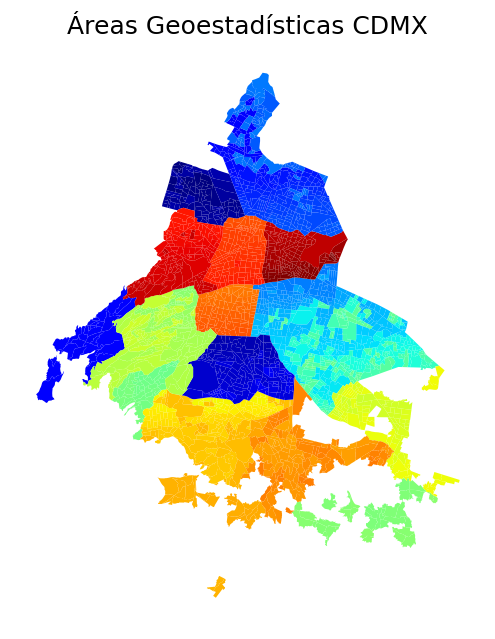

In [4]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
cdmx.plot(ax=ax, cmap='jet', column='CVEGEO')   # jet es un mapa de colores, column es la columna que se va a representar
ax.set_axis_off()
plt.title("Áreas Geoestadísticas CDMX")
plt.show()

In [5]:
denuescdmx = gpd.sjoin(denue, cdmx, how='inner')    # denues en cdmx

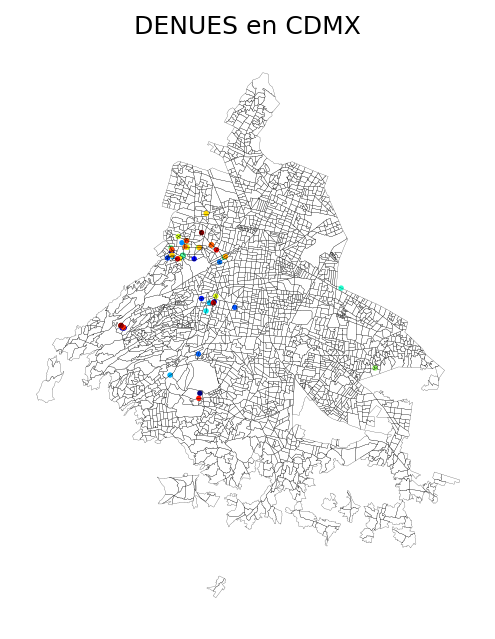

In [6]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
cdmx.boundary.plot(ax=ax, linewidth=0.1, color="black")
denuescdmx.plot(ax=ax, cmap="jet", markersize=10, marker=".")
ax.set_axis_off()
plt.title("DENUES en CDMX")
plt.show()

# **Sup tenemos una zona de interes**

In [7]:
cu = Point(2794873, 816808) # Coordenadas de la Ciudad Universitaria
radio = cu.buffer(5000)     # 5 km alrededor de la Ciudad Universitaria

In [8]:
aoi = gpd.GeoDataFrame({'geometry': [radio]}, crs=cdmx.crs) # Creamos un GeoDataFrame con el área de interés

<Axes: >

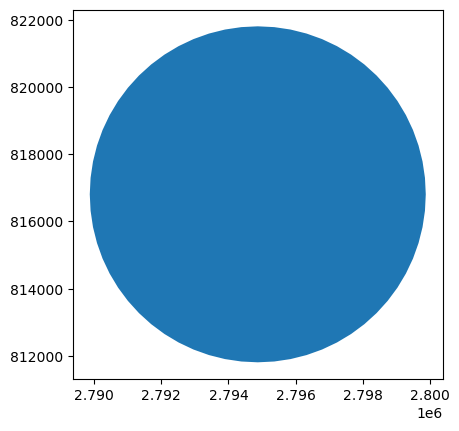

In [9]:
aoi.plot()

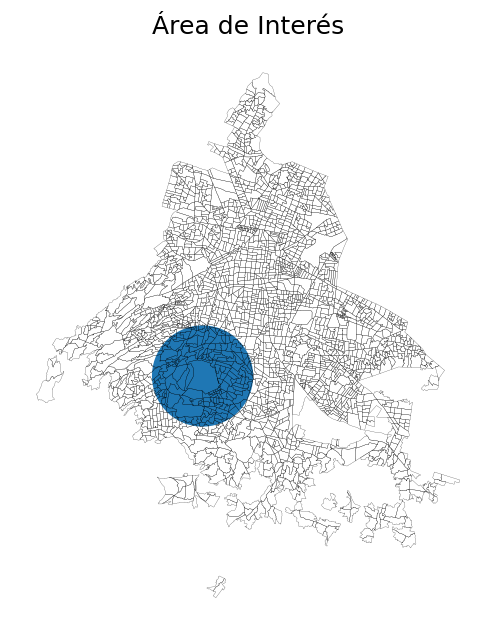

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
cdmx.boundary.plot(ax=ax, linewidth=0.1, color="black")
aoi.plot(ax=ax) # Dibujamos el área de interés
ax.set_axis_off()
plt.title("Área de Interés")
plt.show()

# **`.Overlay()`**

Se utiliza para realizar operaciones espaciales entre dos GeoDataFrames, como combinar dos conjuntos de datos basándose en una operación, como intersección, unión, diferencia, etc. Es útil cuando se necesita analizar la relación espacial entre dos conjuntos de datos.

In [11]:
overlay = gpd.overlay(cdmx, aoi, how='intersection')    # Intersección entre cdmx y aoi

In [12]:
overlay.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901400010967,09,014,0001,0967,"POLYGON ((2797157.584 820871.409, 2797153.43 8..."
1,0901400010971,09,014,0001,0971,"POLYGON ((2797552.315 820960.219, 2797579.227 ..."
2,0901400010914,09,014,0001,0914,"POLYGON ((2795291.761 821737.083, 2795267.655 ..."
3,0901400010882,09,014,0001,0882,"POLYGON ((2794502.785 821767.067, 2794494.15 8..."
4,0901400010933,09,014,0001,0933,"POLYGON ((2796181.571 821518.517, 2796163.695 ..."


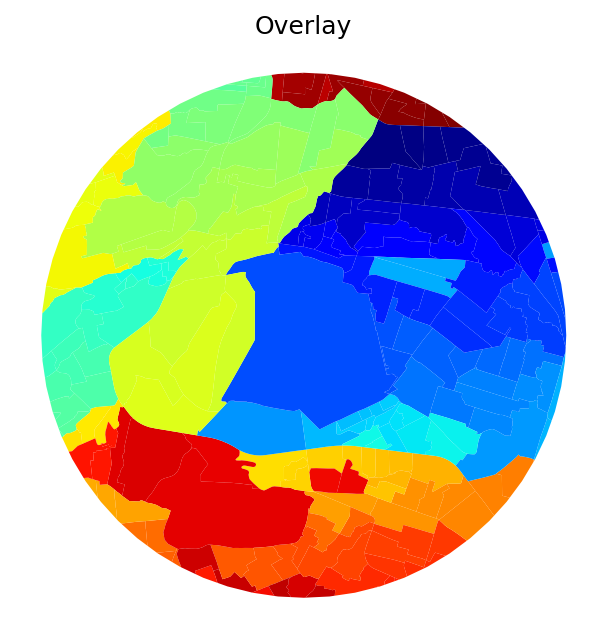

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
overlay.plot(ax=ax, cmap='jet', column='CVEGEO')
ax.set_axis_off()
plt.title("Overlay")
plt.show()

### **DENUES a 5km de CU**

Volvemos a hacer un `.Overlay()` para conocer las denues a 5km de CU

In [14]:
overlay2 = gpd.overlay(denuescdmx, aoi, how='intersection') # Intersección entre las denues en cdmx y el area de interés

In [15]:
overlay2

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,latitud,longitud,fecha_alta,index_right,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,9274655,09003212321000031000055044M3,ARENERA LA FE,ARENERA LA FE SA DE CV,212321,Minería de arena y grava para la construcción,0 a 5 personas,CALLE,LAS PRADERAS,CALLE,...,19.307248,-99.188862,2020-11,1417,0900300011105,09,003,0001,1105,POINT (2794607.291 815108.237)
1,9330561,09010212299000023000000000U0,FRANCO NEVADA MEXICO CORPORATION,FRANCO NEVADA MEXICO CORPORATION,212299,Minería de otros minerales metálicos,11 a 30 personas,None,AVENIDA INSURGENTES SUR,None,...,19.342400,-99.189521,2020-11,1727,0901000011203,09,010,0001,1203,POINT (2794462.173 818986.476)
2,9318031,09008221210000016000000000U0,ESTACION DE COMPRESION SOTO LA MARINA,ESTACION DE COMPRESION SOTO LA MARINA SAPI DE CV,213119,Otros servicios relacionados con la minería,101 a 250 personas,AVENIDA,BOULEVARD ADOLFO RUÍZ CORTINES,CERRADA,...,19.324032,-99.216646,2020-11,388,0900800010086,09,008,0001,0086,POINT (2791659.877 816903.832)
3,9270264,09003212221000011000000000U8,ORO GOLD,ORO GOLD DE MEXICO SA DE CV,212221,Minería de oro,0 a 5 personas,PERIFERICO,BOULEVARD ADOLFO RUIZ CORTINES,CALLE,...,19.302715,-99.189941,2020-11,1417,0900300011105,09,003,0001,1105,POINT (2794503.999 814605.755)


In [16]:
names = overlay2['nom_estab']   # Nombre de los establecimientos

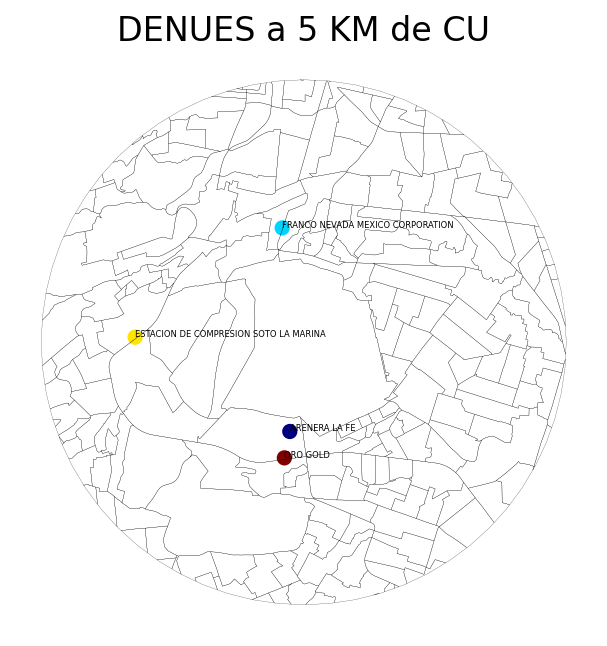

In [17]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
overlay.boundary.plot(ax=ax, linewidth=0.1, color="black")  # Bordes del área de interés
overlay2.plot(ax=ax, cmap="jet", markersize=40)             # Establecimientos
for x, y, label in zip(overlay2.geometry.x, overlay2.geometry.y, names):
    ax.text(x, y, label, fontsize=4)                        # Nombres de los establecimientos
ax.set_title("DENUES a 5 KM de CU", fontsize=16)
ax.set_axis_off()
plt.show()

# **`.Clip()`**

Se utiliza para recortar un GeoDataFrame utilizando la geometría de otro GeoDataFrame, es útil cuando queremos limitar los datos geoespaciales a una región específica definida por otra geometría. Por ejemplo, si se tiene un conjunto de datos de puntos y se desea mantener solo los puntos que caen dentro de una región específica.

In [18]:
clip = cdmx.clip(aoi)   # Recortamos la CDMX con el área de interés

In [19]:
clip.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
573,0901200011547,09,012,0001,1547,"POLYGON ((2794313.508 811842.372, 2793897.548 ..."
582,0901200012225,09,012,0001,2225,"POLYGON ((2794919.492 811823.44, 2794963.717 8..."
416,0901200011072,09,012,0001,1072,"POLYGON ((2796410.807 812112.943, 2796411.735 ..."
486,0901200011104,09,012,0001,1104,"POLYGON ((2796596.678 812178.313, 2796598.744 ..."
484,0901200011087,09,012,0001,1087,"POLYGON ((2796289.492 812022.303, 2796312.917 ..."


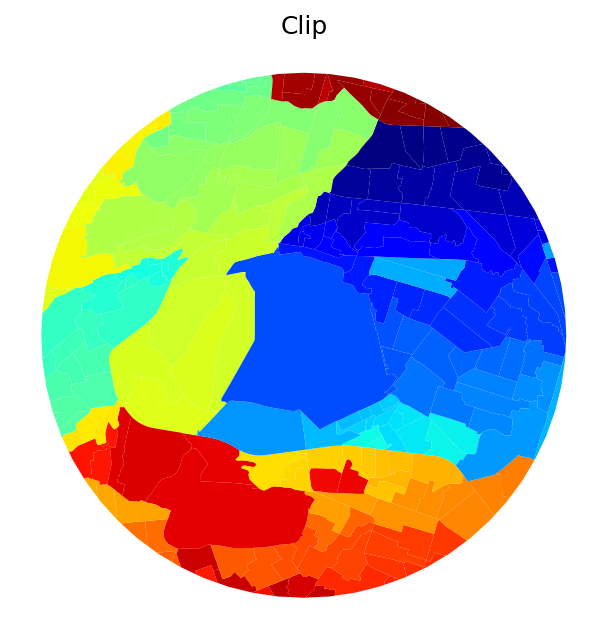

In [20]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
clip.plot(ax=ax, cmap='jet', column='CVEGEO')
ax.set_axis_off()
plt.title("Clip")
plt.show()

### **DENUES a 5km de CU**

In [21]:
clip2 = denuescdmx.clip(aoi)    # Recortamos las denues en cdmx con el área de interés

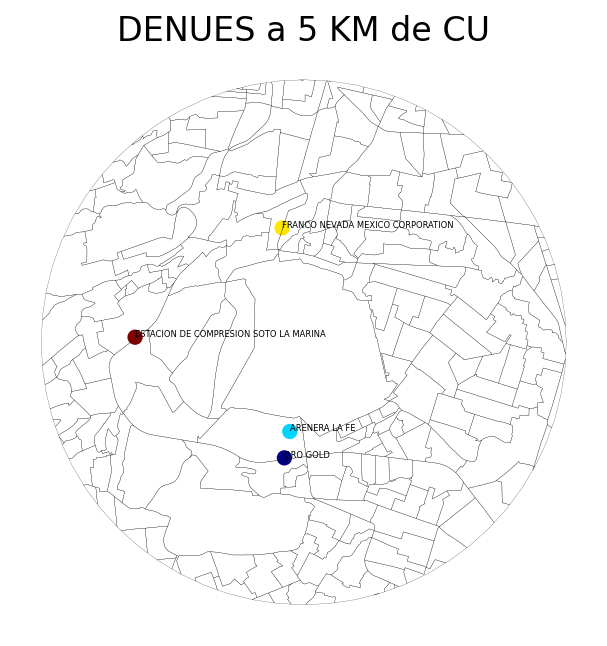

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
clip.boundary.plot(ax=ax, linewidth=0.1, color="black") # Bordes del área de interés
clip2.plot(ax=ax, cmap="jet", markersize=40)            # Establecimientos
for x, y, label in zip(overlay2.geometry.x, overlay2.geometry.y, names):
    ax.text(x, y, label, fontsize=4)                    # Nombres de los establecimientos
ax.set_title("DENUES a 5 KM de CU", fontsize=16)
ax.set_axis_off()
plt.show()